# Analysis of co-simulation of power grid and control network using Mosaik co-simulation framework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import itertools


In [242]:
# The files from simulation to process

In [243]:
path='data/'
output_figures = 'output/'
extension='_int3'
file_readings_t = path+'readings'+extension+'.csv'
file_simulators_t = path+'times'+extension+'.csv'
file_bro_t = ''

In [244]:
# Make an array of the readings
readings = np.genfromtxt(file_readings_t, delimiter=';', dtype = ( 'datetime64[us]', '|S27', '|S8', float))
simulators = np.genfromtxt(file_simulators_t, delimiter=';', dtype = ( '|S16', '|S51', 'datetime64[us]')) 

In [245]:
# Determine minimal time from the readings, which will be the reference time
ref_t = min(readings['f0'][0], simulators['f2'][0])

In [246]:
# Adjust the times 
readings['f0'] = readings['f0']-ref_t
simulators['f2'] = simulators['f2']-ref_t

In [247]:
# Preparing the data to plot from sensor readings
readings_1 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_4-branch_36'))]
ts_r_1 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_4-branch_36'))]
ts_r_1 = ts_r_1.astype('int64')/1e6 #, dtype='int32'

readings_2 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_3-branch_25'))]
ts_r_2 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_3-branch_25'))]
ts_r_2 = ts_r_2.astype('int64')/1e6

readings_3 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_2-branch_24'))]
ts_r_3 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_2-branch_24'))]
ts_r_3 = ts_r_3.astype('int64')/1e6

readings_4 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_1-branch_19'))]
ts_r_4 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_1-branch_19'))]
ts_r_4 = ts_r_4.astype('int64')/1e6

In [248]:
# Preparing the data to plot from simulators events
simulators_1 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = ts_s_1.astype('int64')/1e6 

simulators_2 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = ts_s_2.astype('int64')/1e6 

simulators_5 = simulators['f1'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = simulators['f2'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = ts_s_5.astype('int64')/1e6 

simulators_4 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = ts_s_4.astype('int64')/1e6 

simulators_3 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'Sending new topology to PYPOWER'))]
ts_s_3 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'Sending new topology to PYPOWER'))]
ts_s_3 = ts_s_3.astype('int64')/1e6 

In [249]:
ts_s_5

array([12.309132, 15.307005, 18.294953])

In [252]:
# Convert text to numbers
simulators_1[:] = 0.0 
simulators_1 = simulators_1.astype(float)

simulators_2[:] = 0.1
simulators_2 = simulators_2.astype(float)

#simulators_3[:] = 0.2
simulators_4[:] = 0.2
simulators_4 = simulators_4.astype(float)

simulators_5[:] = 0.3
simulators_5 = simulators_5.astype(float)

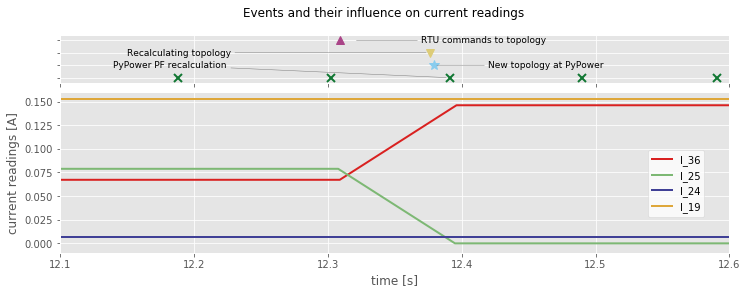

In [253]:
# Plot it all 

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)

branch_36 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')
branch_25 = ax1.plot(ts_r_2, readings_2, linewidth=2, color='#7DB874')
branch_24 = ax1.plot(ts_r_3, readings_3, linewidth=2, color='#404096')
branch_19 = ax1.plot(ts_r_4, readings_4, linewidth=2, color='#DEA73A')

#ax1.setp(branch_36, linewidth=2) 
#ax1.setp(branch_25, linewidth=2) 
#ax1.setp(branch_24, linewidth=2) 
#ax1.setp(branch_19, linewidth=2) 

marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))

plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette

labels = ['l_36', 'l_25', 'l_24', 'l_19']
legend = ax1.legend(labels,
          bbox_to_anchor=(0.97, 0.67),
          fontsize=10)
#ax1.legend(ax1.patches[0:3], 
#           labels[0:3], 
#           bbox_to_anchor=(1.05, 1),
#           fontsize=12)

legend.get_frame().set_facecolor('#ffffff')


fig.suptitle("Events and their influence on current readings")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("current readings [A]")
ax1.set_xlim(12.1, 12.6)
ax1.set_ylim(-0.01, 0.16)


ax2 = plt.subplot2grid((4,1), (0,0))
recalc_pf = ax2.plot(ts_s_1, simulators_1, linestyle='None', markeredgecolor='#117733', markerfacecolor='#117733', marker=next(marker), markersize=8, mew=2) # * x X o + p P s
topo_pf = ax2.plot(ts_s_2, simulators_2, linestyle='None', markeredgecolor='#88CCEE', markerfacecolor= '#88CCEE', marker=next(marker), markersize=10)
rtu_comm = ax2.plot(ts_s_3, simulators_3, 'r<')
topo_swst = ax2.plot(ts_s_4, simulators_4, linestyle='None', markeredgecolor='#DDCC77', markerfacecolor= '#DDCC77', marker=next(marker), markersize=8)
topo_pyp = ax2.plot(ts_s_5, simulators_5, linestyle='None', markeredgecolor='#AA4488', markerfacecolor= '#AA4488', marker=next(marker), markersize=8)


y = [0, 0.1, 0.2, 0.3]
#ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "Sending new TOPO to PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]




ax2.set_yticks(y)
ax2.set_yticklabels([])
ax2.set_ylim(-0.04,0.34)
ax2.set_xticklabels([])
ax2.set_xlim(12.1, 12.6) #39.5-40

### Manual legend ###

ax2.annotate('RTU commands to topology',
             (12.32, 0.3), xycoords='data',
             xytext=(12.37, 0.3), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('Recalculating topology',
             (12.375, 0.2), xycoords='data',
             xytext=(12.15, 0.2), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('New topology at PyPower',
             (12.38, 0.1), xycoords='data',
             xytext=(12.42, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('PyPower PF recalculation',
             (12.39, 0.0), xycoords='data',
             xytext=(12.14, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)


#red_patch = mpatches.Patch(color='red', label='branch_36')

#plt.legend(handles=[red_patch])

plt.show()
fig.savefig(output_figures+'one_event'+extension+'.eps', bbox_inches='tight',format='eps', dpi=1200)



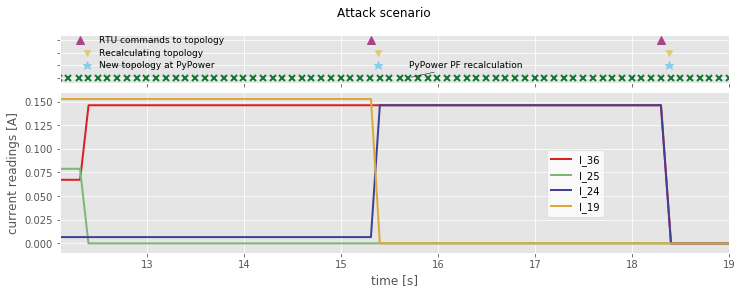

In [254]:
#plot the attack
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)

branch_36 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')
branch_25 = ax1.plot(ts_r_2, readings_2, linewidth=2, color='#7DB874')
branch_24 = ax1.plot(ts_r_3, readings_3, linewidth=2, color='#404096')
branch_19 = ax1.plot(ts_r_4, readings_4, linewidth=2, color='#DEA73A')

marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))



plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette

labels = ['l_36', 'l_25', 'l_24', 'l_19']

legend = ax1.legend(labels,
          bbox_to_anchor=(0.82, 0.67),
          fontsize=10)
#ax1.legend(ax1.patches[0:3], 
#           labels[0:3], 
#           bbox_to_anchor=(1.05, 1),
#           fontsize=12)

legend.get_frame().set_facecolor('#ffffff')


fig.suptitle("Attack scenario")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("current readings [A]")
ax1.set_xlim(12.1, 19)
ax1.set_ylim(-0.01, 0.16)


ax2 = plt.subplot2grid((4,1), (0,0))
recalc_pf = ax2.plot(ts_s_1, simulators_1, linestyle='None', markeredgecolor='#117733', markerfacecolor='#117733', marker=next(marker), markersize=6, mew=2) # * x X o + p P s
topo_pf = ax2.plot(ts_s_2, simulators_2, linestyle='None', markeredgecolor='#88CCEE', markerfacecolor= '#88CCEE', marker=next(marker), markersize=9)
rtu_comm = ax2.plot(ts_s_3, simulators_3, 'r<')
topo_swst = ax2.plot(ts_s_4, simulators_4, linestyle='None', markeredgecolor='#DDCC77', markerfacecolor= '#DDCC77', marker=next(marker), markersize=6)
topo_pyp = ax2.plot(ts_s_5, simulators_5, linestyle='None', markeredgecolor='#AA4488', markerfacecolor= '#AA4488', marker=next(marker), markersize=8)



y = [0, 0.1, 0.2, 0.3]
#ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "Sending new TOPO to PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]




ax2.set_yticks(y)
ax2.set_yticklabels([])
ax2.set_ylim(-0.04,0.34)
ax2.set_xticklabels([])
ax2.set_xlim(12.1, 19) #39.5-40

### Manual legend ###
ax2.annotate('RTU commands to topology',
             (12.5, 0.3), xycoords='data',
             xytext=(12.5, 0.3), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('Recalculating topology',
             (12.5, 0.2), xycoords='data',
             xytext=(12.5, 0.2), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('New topology at PyPower',
             (12.5, 0.1), xycoords='data',
             xytext=(12.5, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('PyPower PF recalculation',
             (15.7, 0.0), xycoords='data',
             xytext=(15.7, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='black'),
            size=9)
#red_patch = mpatches.Patch(color='red', label='branch_36')

#plt.legend(handles=[red_patch])

plt.show()
fig.savefig(output_figures+'attack'+extension+'.eps', bbox_inches='tight',format='eps', dpi=1200)

In [12]:
#times with and without monitoring
file_scada_server_mon = path+'commands_server_mon.txt'
file_scada_server_nomon = path+'commands_server_nomon.txt'

mon_times = np.loadtxt(file_scada_server_mon, dtype=np.float64)
mon_times = mon_times * 1000 # convert to milliseconds 

mon_var = np.var(mon_times)
mon_mean = np.mean(mon_times)

nomon_times = np.loadtxt(file_scada_server_nomon, dtype=np.float64)
nomon_times = nomon_times * 1000 # convert to milliseconds 

nomon_var = np.var(nomon_times)
nomon_mean = np.mean(nomon_times)

print("With monitoring, the communication takes on average {} ms. Variance is {} ms. \n".format(mon_mean, mon_var))
print("Without monitoring, the communication takes on average {} ms. Variance is {} ms. \n".format(nomon_mean, nomon_var))
print("Difference: {} ms.".format(mon_mean-nomon_mean))

With monitoring, the communication takes on average 0.9345555555555565 ms. Variance is 0.045345802469136554 ms. 

Without monitoring, the communication takes on average 0.9324444444444416 ms. Variance is 0.03433380246913566 ms. 

Difference: 0.0021111111111148384 ms.


# Trafo analysis

In [159]:
path='data/'
output_figures = 'output/'
extension='-trafo-2'
file_readings_t = path+'readings'+extension+'.csv'
file_simulators_t = path+'times'+extension+'.csv'
file_bro_t = ''

In [160]:
# Make an array of the readings
readings = np.genfromtxt(file_readings_t, delimiter=';', dtype = ( 'datetime64[us]', '|S27', '|S8', float))
simulators = np.genfromtxt(file_simulators_t, delimiter=';', dtype = ( '|S16', '|S51', 'datetime64[us]')) 

In [161]:
ref_t = min(readings['f0'][0], simulators['f2'][0])

In [162]:
# Adjust the times 
readings['f0'] = readings['f0']-ref_t
simulators['f2'] = simulators['f2']-ref_t

In [163]:
# Preparing the data to plot from sensor readings
readings_1 = readings['f3'][(np.char.equal(readings['f2'],b'Vm')) & (np.char.equal(readings['f1'],b'sensor_4-node_b5'))]
ts_r_1 = readings['f0'][(np.char.equal(readings['f2'],b'Vm')) & (np.char.equal(readings['f1'],b'sensor_4-node_b5'))]
ts_r_1 = ts_r_1.astype('int64')/1e6 #, dtype='int32'

In [164]:
# Preparing the data to plot from simulators events
simulators_1 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = ts_s_1.astype('int64')/1e6 

simulators_2 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = ts_s_2.astype('int64')/1e6 

simulators_5 = simulators['f1'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = simulators['f2'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = ts_s_5.astype('int64')/1e6 

simulators_4 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = ts_s_4.astype('int64')/1e6 

In [165]:
# Convert text to numbers
simulators_1[:] = 0.0 
simulators_1 = simulators_1.astype(float)
simulators_2[:] = 0.1
simulators_2 = simulators_2.astype(float)


#simulators_3[:] = 0.2
simulators_4[:] = 0.2
simulators_4 = simulators_4.astype(float)


simulators_5[:] = 0.3
simulators_5 = simulators_5.astype(float)



In [166]:
# Timepoints from Bro
bro_t = np.array([1527354266.178957, 1527354317.366353])
bro_t_warning = np.array([1527354200.599574, 1527354275.735099, 1527354280.756223, 1527354285.732528, 1527354325.819516, 1527354330.864269, 1527354335.875023 ])

ref_t_epoch = float((ref_t - np.datetime64('1970-01-01T00:00:00Z') - np.timedelta64(2,'h')) / np.timedelta64(1, 's'))

bro_t = bro_t - ref_t_epoch
bro_t = bro_t.astype('int64')#/1e3

bro_t_warning = bro_t_warning - ref_t_epoch
bro_t_warning = bro_t_warning.astype('int64')#/1e3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  after removing the cwd from sys.path.


In [167]:
print(ts_s_5)
bro_t 

[4.20300000e-03 3.85180810e+01 5.59888070e+01 7.30063190e+01
 9.00075960e+01 1.07006042e+02 1.23998799e+02 1.41008098e+02]


array([ 72, 123])

In [172]:
simulators_bro = [0]*len(bro_t)
simulators_bro_warning = [0.1]*len(bro_t_warning)
# simulators_bro = simulators_bro.astype(float)

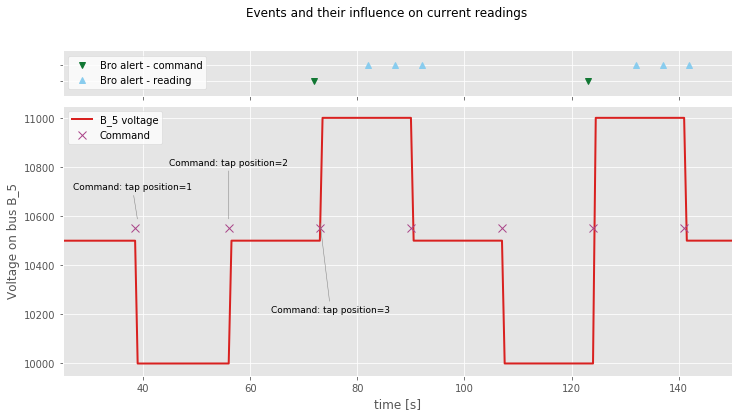

In [240]:
# Plot it all 

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((6,1), (1,0), rowspan=5)

node_b5 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')

marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))

plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette

fig.suptitle("Events and their influence on current readings")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("Voltage on bus B_5")


ax2 = plt.subplot2grid((6,1), (0,0))
bro = ax2.plot(bro_t, simulators_bro, 'v',  markeredgecolor='#117733', markerfacecolor='#117733')
bro_warning = ax2.plot(bro_t_warning, simulators_bro_warning, '^',  markeredgecolor='#88CCEE', markerfacecolor='#88CCEE')


simulators_5[:]=10550
topo_pyp = ax1.plot(ts_s_5, simulators_5, linestyle='None', markeredgecolor='#AA4488', markerfacecolor= '#AA4488', marker=next(marker), markersize=8)


y = [0, 0.1]#, 0.2, 0.3]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]





ax2.set_yticks([0, 0.1])
ax2.set_yticklabels([])
ax2.set_ylim(-0.1,0.2)
ax2.set_xticklabels([])

ax1.set_xlim(25, 150) #39.5-40
ax2.set_xlim(25, 150) #39.5-40

### Manual legend ###
num=131

ax1.annotate('Command: tap position=1',
             (39, 10580),  xycoords='data',
             xytext=(38, 10700), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)


ax1.annotate('Command: tap position=2',
             (56, 10580),  xycoords='data',
             xytext=(56, 10800), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)

ax1.annotate('Command: tap position=3',
             (73, 10580),  xycoords='data',
             xytext=(75, 10200), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)


labels = ['Bro alert - command', 'Bro alert - reading']
legend = ax2.legend(labels,
          fontsize=10, loc= 'center left')
legend.get_frame().set_facecolor('#ffffff')

labels2 = ['B_5 voltage', 'Command']
legend2 = ax1.legend(labels2,
          fontsize=10, loc='upper left')
legend2.get_frame().set_facecolor('#ffffff')

plt.show()
fig.savefig(output_figures+'trafo_event'+extension+'.eps', bbox_inches='tight',format='eps', dpi=1200)




# Trafo analysis - with more readings

In [2]:
path='data/'
output_figures = 'output/'
extension='-trafo-3'
file_readings_t = path+'readings'+extension+'.csv'
file_simulators_t = path+'times'+extension+'.csv'
file_bro_t = ''

In [3]:
# Make an array of the readings
readings = np.genfromtxt(file_readings_t, delimiter=';', dtype = ( 'datetime64[us]', '|S27', '|S8', float))
simulators = np.genfromtxt(file_simulators_t, delimiter=';', dtype = ( '|S16', '|S51', 'datetime64[us]')) 


In [4]:
ref_t = min(readings['f0'][0], simulators['f2'][0])

In [5]:
# Adjust the times 
readings['f0'] = readings['f0']-ref_t
simulators['f2'] = simulators['f2']-ref_t

In [6]:
# Preparing the data to plot from sensor readings
readings_1 = readings['f3'][(np.char.equal(readings['f2'],b'Vm')) & (np.char.equal(readings['f1'],b'sensor_4-node_b5'))]
ts_r_1 = readings['f0'][(np.char.equal(readings['f2'],b'Vm')) & (np.char.equal(readings['f1'],b'sensor_4-node_b5'))]
ts_r_1 = ts_r_1.astype('int64')/1e6 #, dtype='int32'

In [7]:
# Preparing the data to plot from simulators events
simulators_1 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = ts_s_1.astype('int64')/1e6 

simulators_2 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = ts_s_2.astype('int64')/1e6 

simulators_5 = simulators['f1'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = simulators['f2'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = ts_s_5.astype('int64')/1e6 

simulators_4 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = ts_s_4.astype('int64')/1e6 

In [12]:
# Convert text to numbers
simulators_1[:] = 0.0 
simulators_1 = simulators_1.astype(float)
simulators_2[:] = 0.1
simulators_2 = simulators_2.astype(float)


#simulators_3[:] = 0.2
simulators_4[:] = 0.2
simulators_4 = simulators_4.astype(float)


simulators_5[:] = -0.1
simulators_5 = simulators_5.astype(float)



In [13]:
# Input from Bro

str_times = """LOG;1527496517.458169;voltage-violation!
LOG;1527496518.460264;voltage-violation!
LOG;1527496519.450004;voltage-violation!
LOG;1527496520.470273;voltage-violation!
LOG;1527496521.495912;voltage-violation!
LOG;1527496522.476696;voltage-violation!
LOG;1527496523.515765;voltage-violation!
LOG;1527496524.515766;voltage-violation!
LOG;1527496525.499142;voltage-violation!
LOG;1527496526.508143;voltage-violation!
LOG;1527496527.532302;voltage-violation!
LOG;1527496528.561018;voltage-violation!
LOG;1527496529.583921;voltage-violation!
LOG;1527496530.7501;voltage-violation!
LOG;1527496531.587825;voltage-violation!
LOG;1527496532.587751;voltage-violation!
LOG;1527496568.937262;voltage-violation!
LOG;1527496570.136991;voltage-violation!
LOG;1527496570.911472;voltage-violation!
LOG;1527496572.081213;voltage-violation!
LOG;1527496573.145334;voltage-violation!
LOG;1527496573.964693;voltage-violation!
LOG;1527496574.940677;voltage-violation!
LOG;1527496576.085627;voltage-violation!
LOG;1527496576.979375;voltage-violation!
LOG;1527496578.124701;voltage-violation!
LOG;1527496579.057539;voltage-violation!
LOG;1527496580.062667;voltage-violation!
LOG;1527496580.965759;voltage-violation!
LOG;1527496582.020954;voltage-violation!
LOG;1527496583.161792;voltage-violation!
LOG;1527496584.058971;voltage-violation!"""

def f1(str_times=str_times): return iter(str_times.splitlines())

bro_t_warning_array = []# np.array([])
for line in f1(str_times): 
    line_time = line.split(";")[1]
#     print(line_time)
    bro_t_warning_array.append(float(line_time))

bro_t = np.array([1527496515.653007, 1527496566.386087])
# print(bro_t_warning)
bro_t_warning = np.array(bro_t_warning_array)

ref_t_epoch = float((ref_t - np.datetime64('1970-01-01T00:00:00Z') - np.timedelta64(2,'h')) / np.timedelta64(1, 's'))

bro_t = bro_t - ref_t_epoch
bro_t = bro_t.astype('int64')#/1e3

bro_t_warning = bro_t_warning - ref_t_epoch
bro_t_warning = bro_t_warning.astype('int64')#/1e3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


In [14]:
print(ts_s_5)
bro_t 

[5.42300000e-03 1.45207890e+01 3.14849970e+01 4.85119100e+01
 6.55476570e+01 8.25372400e+01 9.99848310e+01 1.17033108e+02]


array([ 49, 100])

In [15]:
simulators_bro_array = [0]*len(bro_t)
simulators_bro_warning_array = [0.1]*len(bro_t_warning)

simulators_bro = np.array(simulators_bro_array)
simulators_bro_warning = np.array(simulators_bro_warning_array)
simulators_bro = simulators_bro.astype(float)
simulators_bro_warning = simulators_bro_warning.astype(float)



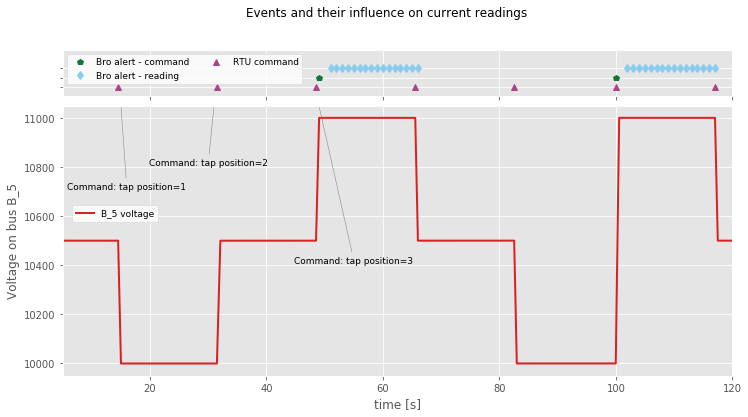

In [54]:
# Plot it all 

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((6,1), (1,0), rowspan=5)

node_b5 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')


marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))

plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette


fig.suptitle("Events and their influence on current readings")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("Voltage on bus B_5")



ax2 = plt.subplot2grid((6,1), (0,0))
bro = ax2.plot(bro_t, simulators_bro, 'p',  markeredgecolor='#117733', markerfacecolor='#117733')
bro_warning = ax2.plot(bro_t_warning, simulators_bro_warning, 'd',  markeredgecolor='#88CCEE', markerfacecolor='#88CCEE')

topo_pyp = ax2.plot(ts_s_5, simulators_5, '^', linestyle='None',  markeredgecolor='#AA4488', markerfacecolor= '#AA4488')#,  markersize=8)


y = [0, 0.1]#, 0.2, 0.3]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]





ax2.set_yticks([-0.1, 0, 0.1])
ax2.set_yticklabels([])
ax2.set_ylim(-0.2,0.3)
ax2.set_xticklabels([])

ax1.set_xlim(5, 120) #39.5-40
ax2.set_xlim(5, 120) #39.5-40

### Manual legend ###
num=131


ax1.annotate('Command: tap position=1',
             (15, 11050),  xycoords='data',
             xytext=(16, 10700), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)


ax1.annotate('Command: tap position=2',
             (31, 11050),  xycoords='data',
             xytext=(30, 10800), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)

ax1.annotate('Command: tap position=3',
             (49, 11050),  xycoords='data',
             xytext=(55, 10400), textcoords='data',ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)

labels = ['Bro alert - command', 'Bro alert - reading', 'RTU command']
legend = ax2.legend(labels,
          fontsize=9, loc= 'upper left',
                   ncol = 2)
legend.get_frame().set_facecolor('#ffffff')

labels2 = ['B_5 voltage']
legend2 = ax1.legend(labels2,
          bbox_to_anchor=(0.24 ,0.53), bbox_transform=plt.gcf().transFigure, 
          fontsize=9)#, loc='center left')
legend2.get_frame().set_facecolor('#ffffff')

plt.show()
fig.savefig(output_figures+'trafo_event'+extension+'.png', bbox_inches='tight',format='png', dpi=1200)


